In [ ]:
import numpy as np
from scipy.linalg import toeplitz as toep

def centered_finite_diff(N,h): #centered
  line = np.zeros(N)
  line[1] = 2/3 ; line[N-1] = -2/3 ; line[2] = -1/12 ; line[N-2] = 1/12

  matrix = 1/h * toep(-line,line)

  return matrix

def forward_finite_diff(N,h): #forward
  line = np.zeros(N)
  line[0] = -25/12 ; line[1] = 4 ; line[2] = -3 ; line[3] = 4/3 ; line[4] = -1/4
  
  line2 = np.zeros(N)
  line2[0] = -25/12 ; line2[N-1] = 4 ; line2[N-2] = -3 ; line2[N-3] = 4/3 ; line2[N-4] = -1/4

  matrix = 1/h * toep(line2,line)

  return matrix

def backward_finite_diff(N,h): #backward
  line = np.zeros(N)
  line[0] = 25/12 ; line[1] = -4 ; line[2] = 3 ; line[3] = -4/3 ; line[4] = 1/4
  
  line2 = np.zeros(N)
  line2[0] = 25/12 ; line2[N-1] = -4 ; line2[N-2] = 3 ; line2[N-3] = -4/3 ; line2[N-4] = 1/4

  matrix = 1/h * toep(line,line2)

  return matrix

def L_matrix(A,B,C,N): # A : Centered_finite_diff , B : Forward_finite_diff , C : Backward_finite_diff
  matrix = np.zeros_like(A)
  matrix[0] = B[0] ; matrix[1] = B[1]
  matrix[N-1] = C[N-1] ; matrix[N-2] = C[N-2]
  matrix[2:N-2] = A[2:N-2]

  return matrix

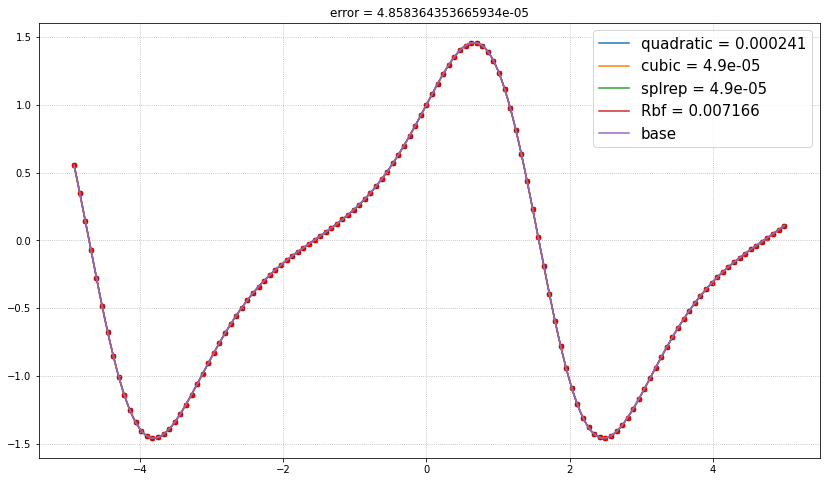

In [ ]:
from matplotlib import pyplot as plt

N = 128 ; h = 10/N
x = -5 + np.arange(1,N + 1,1) * h

u = np.e**np.sin(x)
uprime = np.cos(x) * u

A = centered_finite_diff(N,h)
B = forward_finite_diff(N,h)
C = backward_finite_diff(N,h)

L = L_matrix(A,B,C,N)

plt.figure(figsize=(14,8))

plt.scatter(x,uprime,color='black',s=20,marker="o")
plt.scatter(x,np.dot(L,u),color='red',s=20,marker="X")

plt.grid(linestyle=':')

error = max(abs(uprime-np.dot(L,u)))

from scipy.interpolate import interp1d, splrep, splev, Rbf

xx = np.linspace(x[0],x[-1],10**3)
uu_prime = np.cos(xx) * (np.e**np.sin(xx))

inter_uprime1 = interp1d(x,np.dot(L,u),kind='quadratic',fill_value="extrapolate")
uu1 = inter_uprime1(xx)
error1 = max(abs(uu_prime-uu1))

inter_uprime2 = interp1d(x,np.dot(L,u),kind='cubic',fill_value="extrapolate")
uu2 = inter_uprime2(xx)
error2 = max(abs(uu_prime-uu2))

inter_uprime3 = splrep(x,np.dot(L,u))
uu3 = splev(xx,inter_uprime3)
error3 = max(abs(uu_prime-uu3))

inter_uprime4 = Rbf(x,np.dot(L,u))
uu4 = inter_uprime4(xx)
error4 = max(abs(uu_prime-uu4))

plt.plot(xx,uu1,label='quadratic = '+str(round(error1,6)))
plt.plot(xx,uu2,label='cubic = '+str(round(error2,6)))
plt.plot(xx,uu3,label='splrep = '+str(round(error3,6)))
plt.plot(xx,uu4,label='Rbf = '+str(round(error4,6)))
plt.plot(xx,uu_prime,label='base')
plt.title("error = "+str(error))
plt.legend(fontsize=15)